In [40]:
import numpy as np
import pandas as pd
import json
import networkx as nx
import itertools
import matplotlib

In [22]:
# fonction pour générer les résultats du secret santa
def secret_santa(liste_participants, config):
    '''
    la fonction prend en arguments une liste de participants, et une configuration qui définit:
    - les relations offrant > recevant prédéfinies
    - les relations offrant > recevant à exclure  
    elle renvoie une liste de couples (offrant, recevant)
    '''
    resultats = []
    offrants_restant = liste_participants.copy()
    recevants_restant = liste_participants.copy()
    exclusions = config['exclusions'].copy()
    obligations = config['obligations'].copy()

    # on traite d'abord les obligations
    print('traitement des obligations')
    for offrant, recevant in obligations:
        print('offrant: {}, recevant: {}'.format(offrant, recevant))
        resultats.append((offrant, recevant))
        offrants_restant.pop(offrants_restant.index(offrant))
        recevants_restant.pop(recevants_restant.index(recevant))
        
    # on parcours au hasard la liste des participants
    print('parcours de la liste')
    for i_offrant_a_traiter in np.random.permutation(len(offrants_restant)):
        offrant_a_traiter = offrants_restant[i_offrant_a_traiter]
        print('offrant: {}'.format(offrant_a_traiter))
        # on tire au hasard les recevants restants
        for i_recevant_possible in np.random.permutation(len(recevants_restant)):
            recevant_a_traiter = recevants_restant[i_recevant_possible]
            print('recevant: {}'.format(recevant_a_traiter))
            # vérification des exclusions
            if (offrant_a_traiter, recevant_a_traiter) not in exclusions and offrant_a_traiter != recevant_a_traiter:
                resultats.append((offrant_a_traiter, recevant_a_traiter))
                recevants_restant.pop(i_recevant_possible)
                break
            else:
                continue
    return(resultats)

In [24]:
liste_participants = ['Papa', 'Maman', 'Didier', 'Anne', 'Cécile', 'Mamy', 'Bruno']
config = {
    'exclusions':[
        ('Papa', 'Maman'),
        ('Maman', 'Papa'),
        ('Cecile', 'Bruno'),
        ('Bruno', 'Cecile'),
        ('Anne', 'Didier'),
        ('Didier', 'Anne')],
    'obligations':[
        ('Bruno', 'Papa'),
        ('Didier', 'Maman')]
}
secret_santa_results = secret_santa(liste_participants, config)
pd.DataFrame(secret_santa_results, columns = ['offrant', 'recevant'])

,offrant,recevant
0,Bruno,Papa
1,Didier,Maman
2,Cécile,Anne
3,Maman,Mamy
4,Mamy,Bruno
5,Papa,Didier
6,Anne,Cécile


In [25]:
liste_participants = ['TERRIER Viktor', 'FINET Sebastien', 'GIROD Marie', 'COGEN Florent', 'DUMAS Jonathan', 'LITTLE Emily', 'DUSSARTRE Virginie', 'HAMDANE Ibtissam', 
                      'ARULPRAGASAM Steven', 'MOTHE Axel', 'BUSTARRET Quentin', 'LEMETAYER Bruno']
config = {
    'exclusions':[],
    'obligations':[]}
secret_santa_results = secret_santa(liste_participants, config)
pd.DataFrame(secret_santa_results, columns = ['offrant', 'recevant'])

,offrant,recevant
0,DUMAS Jonathan,DUSSARTRE Virginie
1,MOTHE Axel,LEMETAYER Bruno
2,TERRIER Viktor,DUMAS Jonathan
3,DUSSARTRE Virginie,TERRIER Viktor
4,FINET Sebastien,HAMDANE Ibtissam
5,COGEN Florent,GIROD Marie
6,ARULPRAGASAM Steven,LITTLE Emily
7,LITTLE Emily,MOTHE Axel
8,BUSTARRET Quentin,ARULPRAGASAM Steven
9,LEMETAYER Bruno,BUSTARRET Quentin


In [27]:
with open('data/config_famille.json') as f:
    config = json.load(f)
liste_participants = pd.read_csv('data/participants_famille.csv', header=None, names=['participants'])['participants'].to_list()

secret_santa_results = secret_santa(liste_participants, config)
pd.DataFrame(secret_santa_results, columns = ['offrant', 'recevant'])

,offrant,recevant
0,Bruno,Papa
1,Didier,Maman
2,Anne,Didier
3,Papa,Mamy
4,Cécile,Bruno
5,Maman,Cécile
6,Mamy,Anne


In [25]:
with open('config_exemple.json') as f:
    config = json.load(f)
liste_participants = pd.read_csv('participants_exemple.csv', header=None, names=['participants'])['participants'].to_list()

secret_santa_results = secret_santa(liste_participants, config)
pd.DataFrame(secret_santa_results, columns = ['offrant', 'recevant'])

traitement des obligations
offrant: Alpha, recevant: Beta
parcours de la liste
offrant: Gamma
recevant: Alpha
offrant: Beta
recevant: Omega
offrant: Omega
recevant: Gamma
offrant: Delta
recevant: Delta


,offrant,recevant
0,Alpha,Beta
1,Gamma,Alpha
2,Beta,Omega
3,Omega,Gamma


# Avec des graphes

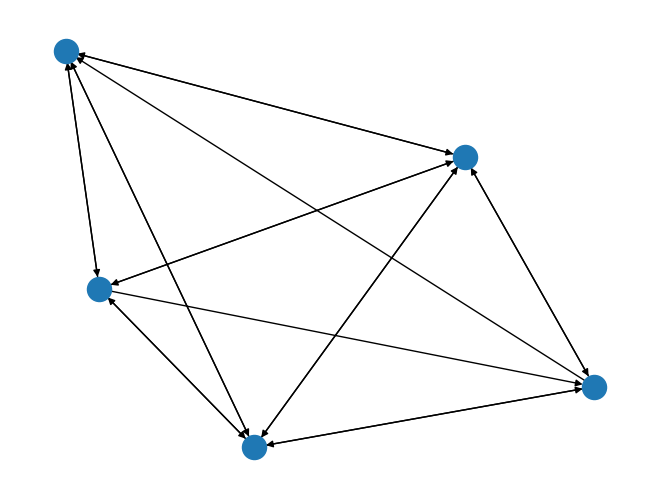

In [90]:
exclusions = config['exclusions'].copy()
edge_list = pd.DataFrame(
    [(item[0], item[1]) for item in itertools.product(liste_participants, liste_participants) if item[0] != item[1] and [item[0], item[1]] not in exclusions], 
    columns = ['offrant', 'recevant'])
G = nx.from_pandas_edgelist(
    edge_list, 
    source = 'offrant',
    target =  'recevant',
    create_using = nx.DiGraph())
nx.draw(G)


traitement des obligations
offrant: Alpha, recevant: Beta


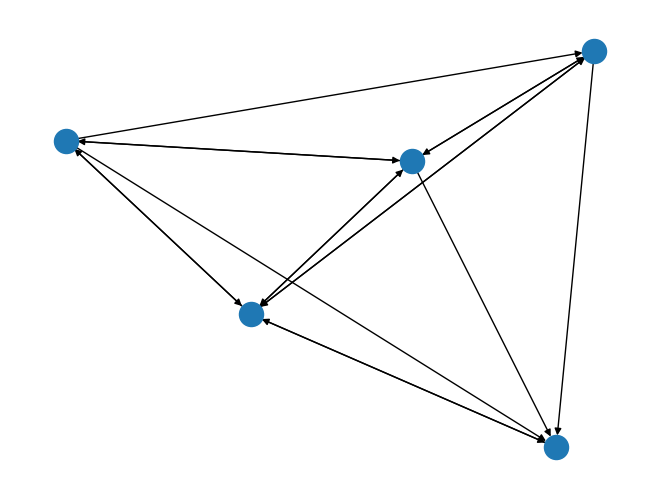

In [91]:
obligations = config['obligations'].copy()
offrants_restant = liste_participants.copy()

# on traite d'abord les obligations
print('traitement des obligations')
for offrant, recevant in obligations:
    print('offrant: {}, recevant: {}'.format(offrant, recevant))
    # on enlève les recevants qui ne sont pas celui de l'obligation
    G.remove_edges_from([(offrant, target) for target in G[offrant] if target != recevant])
    offrants_restant.pop(offrants_restant.index(offrant))
nx.draw(G)

In [92]:
# on parcours au hasard la liste des participants
print('parcours de la liste')
for i_offrant_a_traiter in np.random.permutation(len(offrants_restant)):
    offrant_a_traiter = offrants_restant[i_offrant_a_traiter]
    print('offrant à traiter: {}'.format(offrant_a_traiter))
    # on tire au hasard les recevants restants parmi les target 
    recevant_a_traiter = list(G[offrant_a_traiter])[np.random.randint(len(G[offrant_a_traiter]))]
    print('recevant choisi: {}'.format(recevant_a_traiter))
    # on enlève les recevants qui ne sont pas celui de l'obligation
    G.remove_edges_from([(offrant_a_traiter, target) for target in G[offrant_a_traiter] if target != recevant_a_traiter])
    

parcours de la liste
offrant à traiter: Gamma
recevant choisi: Alpha
offrant à traiter: Omega
recevant choisi: Gamma
offrant à traiter: Delta
recevant choisi: Gamma
offrant à traiter: Beta
recevant choisi: Gamma


In [95]:
pd.DataFrame(list(G.edges), columns = ['offrant', 'recevant'])

,offrant,recevant
0,Alpha,Beta
1,Beta,Gamma
2,Gamma,Alpha
3,Omega,Gamma
4,Delta,Gamma
